# HW 7: Modularity, Betweenness, Girvan-Newman Partitioning
    Abraham Harris

In [43]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from typing import Tuple, Set, Hashable, Union, Literal
from numpy import linalg as linalg
from matplotlib.axes import Axes
from dendrogram_handler_v2 import DendrogramHandler
from scipy.cluster.hierarchy import dendrogram # type: ignore


#################
## Dendrograms ##
#################
HeightMetric = Literal["distance", "max_cluster"]

def show_dendrogram(G: nx.Graph,
                    title: str = "Dendrogram",
                    height_metric: HeightMetric = "distance") -> None:
    plt.figure()
    myHandler: DendrogramHandler = DendrogramHandler(G, height_metric=height_metric)
    Z = myHandler.link_matrix       # Python style guides suggest direct access of public class variables
    ZLabels = myHandler.link_matrix_labels
    dendrogram(Z, labels=ZLabels)
    plt.title(title)
    plt.xlabel("Node")
    if height_metric == "max_cluster":
        plt.ylabel("Max Cluster Size")
    else:
        plt.ylabel("Distance")
    del myHandler

####################################
## Create datatype that specifies ##
## the style of the graph display ##
####################################
PlotType = Literal[
    "GRAPHVIZ",
    "CIRCULAR",
    "SPRING",
    "DOT"
]

#################################
## Show graph with node labels ##
## in a chosen set of axes     ##
#################################
def show_graph(G: nx.Graph,
               title: str = "",
               labels: Union[dict[int, str], None] = None,
               axes: Union[None, Axes] = None,
               node_color: Union[None, list[str]] = None,
               plot_style: PlotType = "GRAPHVIZ"
               ) -> dict[Hashable, Tuple[float, float]]:
    if labels is None:
        labels = {node: str(node) for node in G.nodes()}
    if axes is None:
        plt.figure(figsize=(4,4))
        axes: Axes = plt.gca()
    if node_color is None:
        node_color = ['y' for _ in G.nodes]
    node_positions: dict[Hashable, tuple[float, float]] = dict()
    if plot_style == "GRAPHVIZ":
        node_positions = nx.nx_pydot.graphviz_layout(G,prog='neato')
    elif plot_style == "DOT":
        node_positions = nx.nx_pydot.graphviz_layout(G,prog='dot')
    elif plot_style == "SPRING":
        node_positions = nx.spring_layout(G)
    else:
        node_positions = nx.circular_layout(G)

    nx.draw(G, 
        node_positions, 
        node_color = node_color, 
        with_labels = True, 
        labels = labels,
        node_size = 300,
        ax=axes, 
        alpha=0.8)
    
    axes.set_title(title)
    axes.set_aspect('equal')

    # Return the node positions in case I want to use them again
    return node_positions

def get_NCM_Figure3_14():
    G = nx.Graph()
    G.add_nodes_from(range(0,14))
    G.add_edges_from([(0,1),(0,2),(1,2),(3,4),(3,5),(4,5),(8,9),(8,10),(9,10),(11,12),(11,13),(12,13),(2,6),(5,6),(7,8),(7,11),(6,7)])
    pos = nx.spring_layout(G)
    return G, pos

def draw_edge_by_type(G, pos, edge, partition):
    edge_style = 'dashed'
    for part in partition:
        if edge[0] in part and edge[1] in part:
            edge_style = 'solid'
            break
    nx.draw_networkx_edges(G, pos, edgelist=[edge], style = edge_style)

def show_partitions(G, partition_list, pos = None):
    color_list = ['c','m','y','g','r']
    plt.figure()
    plt.axis('off')
    if pos is None: pos = nx.spring_layout(G, seed = 10)
    for i in range(len(partition_list)):
        nx.draw_networkx_nodes(partition_list[i],pos,node_color=color_list[i%len(color_list)], alpha = 0.8)
    for edge in G.edges:
        draw_edge_by_type(G, pos, edge, partition_list)
    nx.draw_networkx_labels(G,pos)
    if len(G.edges) == 0:
        mod = 0
    else:
        mod = nx.algorithms.community.quality.modularity(G,partition_list)
    title = "Modularity = " + str(np.round(mod,2))
    plt.title(title)

## Graph Visualizations

### 1.

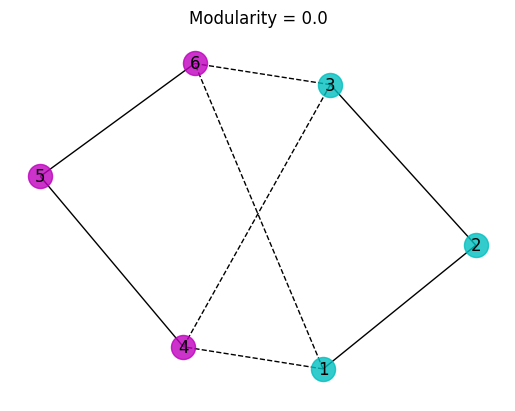

In [7]:
# Build graph
G: nx.Graph = nx.Graph()
# Add vertices
G.add_nodes_from([1, 2, 3, 4, 5, 6])
# Add edges
G.add_edges_from([(1,2), (2,3), (3,4), (4,5), (5,6), (6,1), (1,4), (3,6)])
# Define partition
partition: Tuple[Set[Hashable], ...] = (set([1, 2, 3]), set([4, 5, 6]))

show_partitions(G, partition)

### 2.

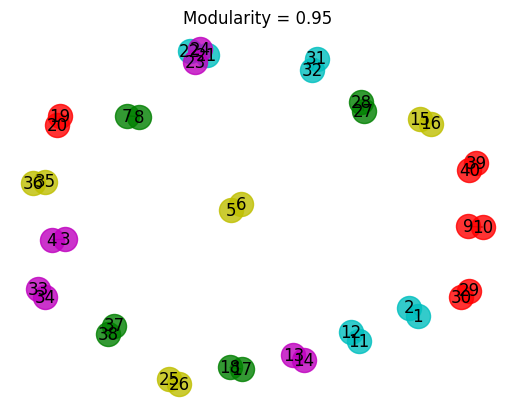

In [28]:
# Build graph
G: nx.Graph = nx.Graph()
# Add vertices
G.add_nodes_from([i for i in range(1, 41)])
# Add edges
G.add_edges_from([
    (1,2), (3,4), (5,6), (7,8), (9,10), (11,12), (13,14), 
    (15,16), (17,18), (19,20), (21,22), (23,24), (25,26),
    (27,28), (29,30), (31,32), (33,34), (35,36), (37,38),
    (39,40)
])
# Define partition
partition: Tuple[Set[Hashable], ...] = (
    set([1, 2]), set([3,4]), set([5,6]), set([7,8]), set([9,10]), 
    set([11,12]), set([13,14]), set([15,16]), set([17,18]),
    set([19,20]), set([21,22]), set([23,24]), set([25,26]),
    set([27,28]), set([29,30]), set([31,32]), set([33,34]),
    set([35,36]), set([37,38]), set([39,40])
)

show_partitions(G, partition)

### 3.

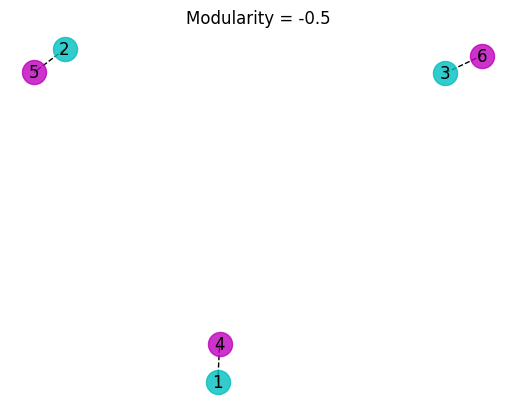

In [29]:
# Build graph
G: nx.Graph = nx.Graph()
# Add vertices
G.add_nodes_from([1, 2, 3, 4, 5, 6])
# Add edges
G.add_edges_from([(1,4), (2,5), (3,6)])
# Define partition
partition: Tuple[Set[Hashable], ...] = (set([1, 2, 3]), set([4, 5, 6]))

show_partitions(G, partition)

### 4.

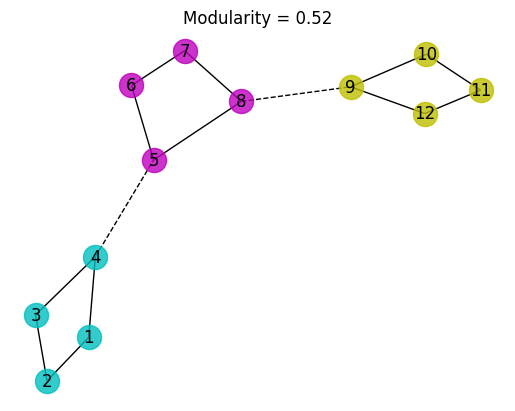

In [31]:
# Build graph
G: nx.Graph = nx.Graph()
# Add vertices
G.add_nodes_from([i for i in range(1, 13)])
# Add edges
G.add_edges_from([
    (1,2), (2,3), (3,4), (4,1),
    (5,6), (6,7), (7,8), (8,5),
    (9,10), (10,11), (11,12), (12,9),
    (4,5), (8,9)
])
# Define partition
partition: Tuple[Set[Hashable], ...] = (
    set([1, 2, 3, 4]), set([5, 6, 7, 8]), set([9, 10, 11, 12])
)

show_partitions(G, partition)

### 5. 

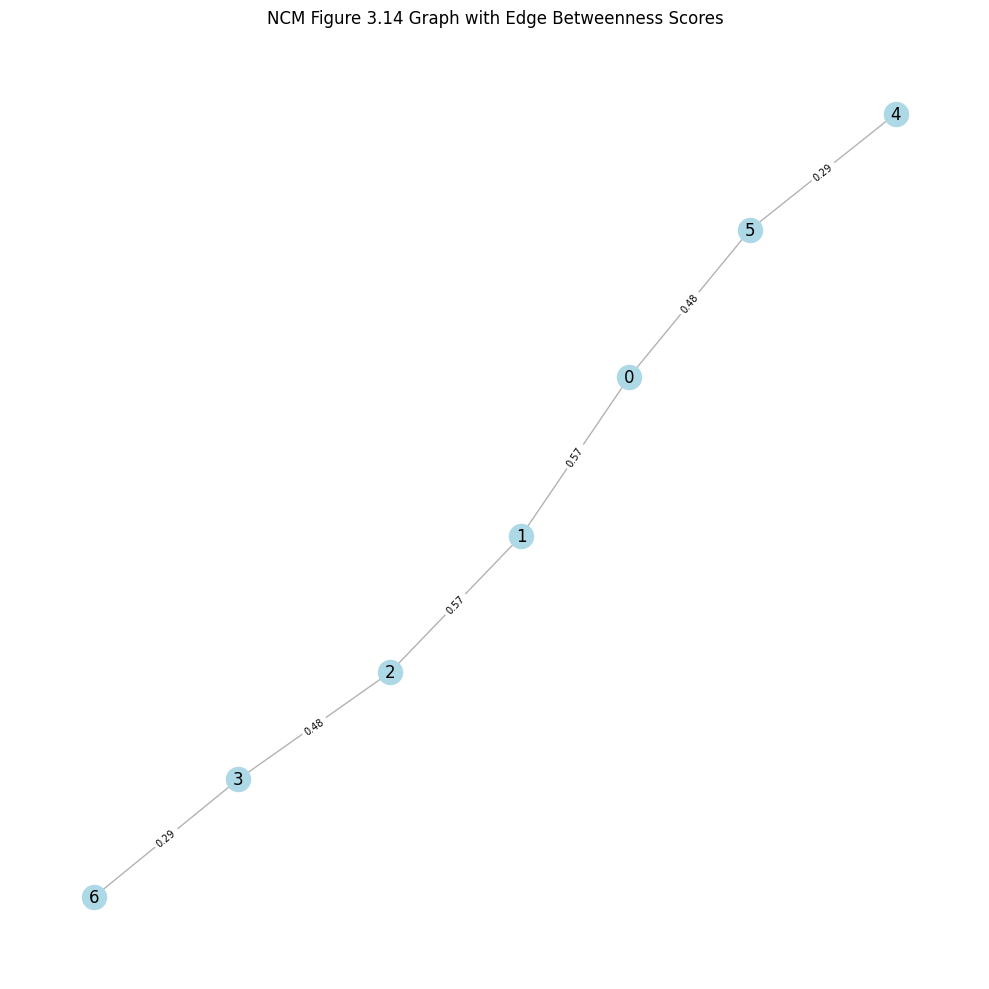

In [42]:
# Build graph
G: nx.Graph = nx.Graph()
# TODO: Add vertices
G.add_nodes_from([i for i in range(7)])
# TODO: Add edges
G.add_edges_from([
    (0,1), (2,3), (4,5),
    (5,0), (1,2), (3,6)
])

edge_scores = nx.edge_betweenness_centrality(G)
pos = nx.nx_pydot.graphviz_layout(G, prog='neato')

# Create a figure and show the graph
fig, ax = plt.subplots(figsize=(10, 10))

# Draw the graph
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=300, ax=ax)
nx.draw_networkx_labels(G, pos, ax=ax)
nx.draw_networkx_edges(G, pos, ax=ax, alpha=0.3)

# Label edges with their betweenness scores (rounded to 2 decimal places)
edge_labels = {edge: f"{score:.2f}" for edge, score in edge_scores.items()}
nx.draw_networkx_edge_labels(G, pos, edge_labels, ax=ax, font_size=7)

ax.set_title("NCM Figure 3.14 Graph with Edge Betweenness Scores")
ax.axis('off')
plt.tight_layout()
plt.show()

### 7.

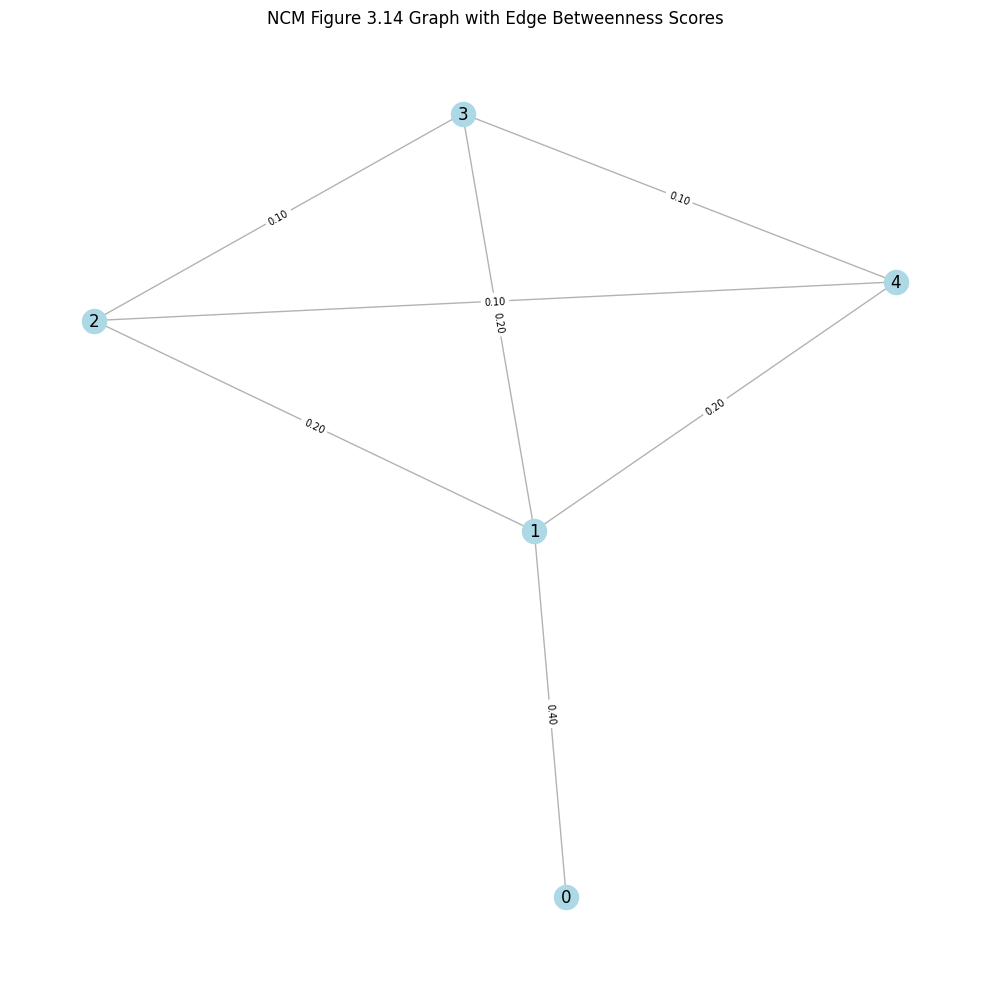

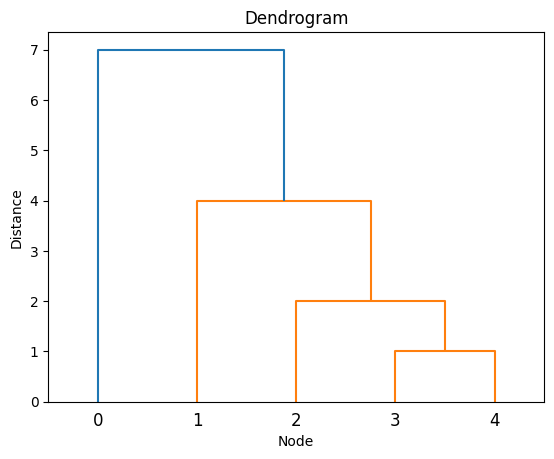

In [54]:
### Make graph ###
G = nx.Graph()
G.add_nodes_from([i for i in range(5)])
G.add_edges_from([
    (0,1), (1,2), (2,3), (3,4),
    (1,3), (1,4), (2,4)
])

### Show graph ###
edge_scores = nx.edge_betweenness_centrality(G)
pos = nx.nx_pydot.graphviz_layout(G, prog='neato')

# Create a figure and show the graph
fig, ax = plt.subplots(figsize=(10, 10))

# Draw the graph
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=300, ax=ax)
nx.draw_networkx_labels(G, pos, ax=ax)
nx.draw_networkx_edges(G, pos, ax=ax, alpha=0.3)

# Label edges with their betweenness scores (rounded to 2 decimal places)
edge_labels = {edge: f"{score:.2f}" for edge, score in edge_scores.items()}
nx.draw_networkx_edge_labels(G, pos, edge_labels, ax=ax, font_size=7)

ax.set_title("NCM Figure 3.14 Graph with Edge Betweenness Scores")
ax.axis('off')
plt.tight_layout()
plt.show()

### Dendrogram ###
show_dendrogram(G)